In [1]:
# Enable interactive rotation of graph
%matplotlib notebook

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = np.loadtxt('sdata.csv',delimiter=',')

<IPython.core.display.Javascript object>


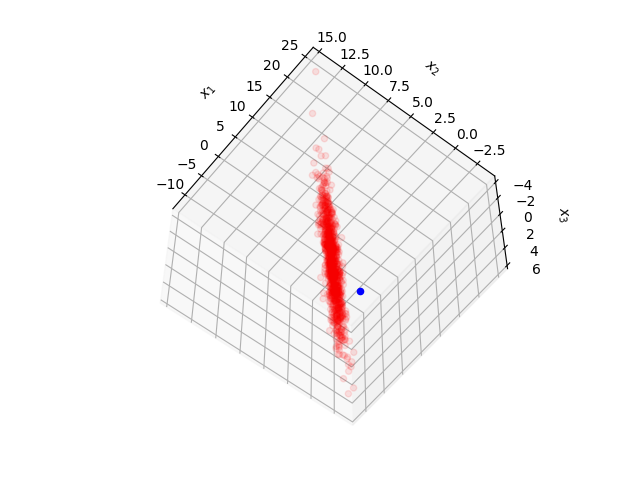

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [4]:
# Subtract mean
X_m = X - np.mean(X, 0)

<IPython.core.display.Javascript object>


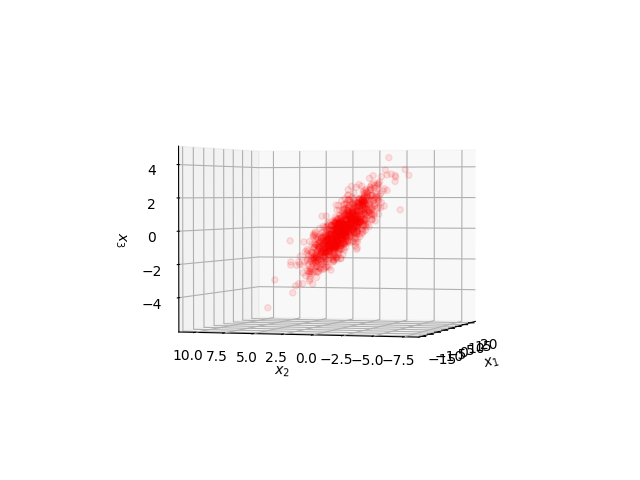

In [5]:
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [25]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a=VT[0]

<IPython.core.display.Javascript object>


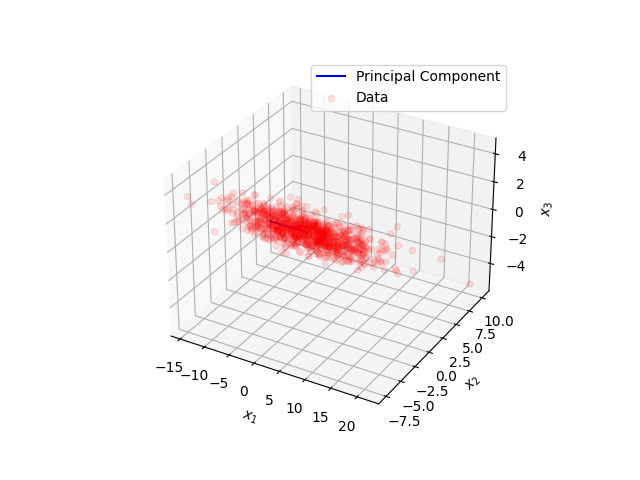

In [26]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

<IPython.core.display.Javascript object>


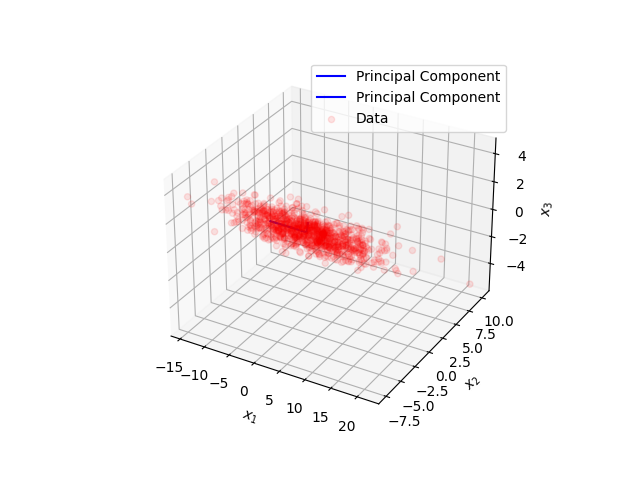

0.24467993920039152 0.0037978421359774472 0.9695964643850571


In [28]:
#2h)

a2=VT[1]
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')

s2=s[1]/np.sqrt(np.shape(X_m)[0])
ax.plot([0,s2*a2[0]],[0,s2*a2[1]],[0,s2*a2[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

print(a2[0],a2[1],a2[2])

In [44]:
# 3 a)
data=loadmat('face_emotion_data.mat')
y=data['y']
X=data['X']


In [61]:
e=[]
for d in range(1,10):
    er=[]
    for i in range(7):
        for j in range(i+1,8):
            holdout=[elt for elt in range(16*i,16*i+16)]
            holdout+=[elt for elt in range(16*j,16*j+16)]
#             holdout=holdout+other
            learn=[elt for elt in range(len(X)) if elt not in holdout]
            hx=X[holdout,:]
            hy=y[holdout]
            lx=X[learn,:]
            ly=y[learn]
            U,s,VT=np.linalg.svd(lx,full_matrices=False)
            sInv=np.diag([1/i for i in s])
            w=VT[:d,:].T@sInv[:d,:d]@(U[:,:d].T)@ly
            error=len([1 for i in np.hstack((np.sign(hx@w),hy)) if i[0]!=i[1]])
            er.append(error/len(hy))
    e.append((sum(er)/len(er)*100,d))
print("Performance for truncated SVD's avg error rate is",np.mean(e),"%")

Performance for truncated SVD's avg error rate is 8.14236111111111 %


In [60]:
#3 b)
e=[]
l = [0, 1/2, 1,2,4,8,16]
for d in l:
    er=[]
    for i in range(7):
        for j in range(i+1,8):
            holdout=[elt for elt in range(16*i,16*i+16)]
            holdout+=[elt for elt in range(16*j,16*j+16)]
#             holdout=holdout+other
            learn=[elt for elt in range(len(X)) if elt not in holdout]
            hx=X[holdout,:]
            hy=y[holdout]
            lx=X[learn,:]
            ly=y[learn]
            U,s,VT=np.linalg.svd(lx,full_matrices=False)
            sInv=np.diag([i**2 for i in s])
            w=np.linalg.inv((VT.T@sInv@VT+d*np.identity(len(lx[0]))))@VT.T@np.diag(s)@U.T@ly
            error=len([1 for i in np.hstack((np.sign(hx@w),hy)) if i[0]!=i[1]])
            er.append(error/len(hy))
    e.append((sum(er)/len(er)*100,d))
print("Performance for truncated SVD's avg error rate is",np.mean(e),"%")

Performance for truncated SVD's avg error rate is 4.62563775510204 %
